In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

import warnings 
warnings.filterwarnings("ignore")

In [2]:
level=[i for i in range(1,20)]
salary = [i**4 for i in range(1,20)]


In [3]:
df= pd.DataFrame({"Level":level,"Salary":salary})
df.head(2)

,Level,Salary
0,1,1
1,2,16


<AxesSubplot:>

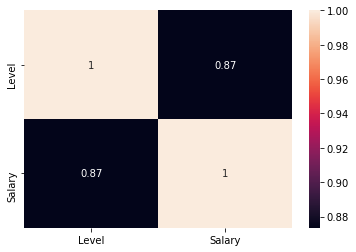

In [4]:
sns.heatmap(df.corr(),annot=True)

In [5]:
xmean=df["Level"].mean()
ymean=df["Salary"].mean()
print(xmean)
print(ymean)

10.0
29614.0


In [6]:
features=df.iloc[:,:-1]
target=df.iloc[:,-1]

In [7]:
features.head()

,Level
0,1
1,2
2,3
3,4
4,5


In [8]:
target

0          1
1         16
2         81
3        256
4        625
5       1296
6       2401
7       4096
8       6561
9      10000
10     14641
11     20736
12     28561
13     38416
14     50625
15     65536
16     83521
17    104976
18    130321
Name: Salary, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,random_state=1,test_size=0.3)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest) 


In [10]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(ytest,ypred)
mse=mean_squared_error(ytest,ypred)
rmse=np.sqrt(mse)
r2=r2_score(ytest,ypred)

In [11]:
print(f"MAE :{mae}\nMSE:{mse}\nRMSE:{rmse}\nR2_SCORE:{r2}")

MAE :12370.30301900857
MSE:186384167.4172301
RMSE:13652.258692876798
R2_SCORE:0.7276345183250197


<AxesSubplot:xlabel='Salary', ylabel='Density'>

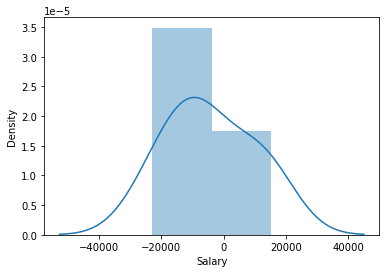

In [12]:
sns.distplot(ytest-ypred)

In [13]:
df=pd.read_csv("C:/Users/Admin/Documents/DILIP/ML-main/ML_Files/Advertising.csv",index_col=0)
df.head(2)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [15]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


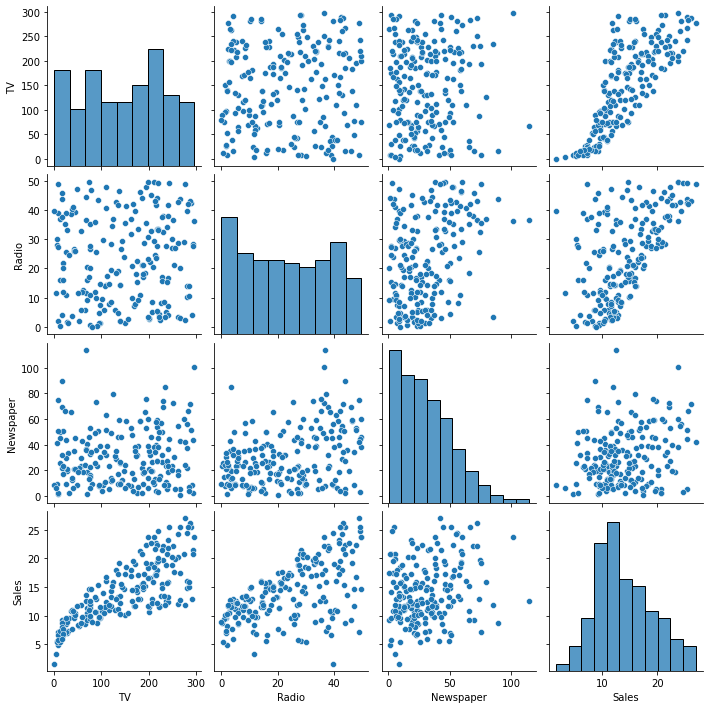

In [16]:
sns.pairplot(df)

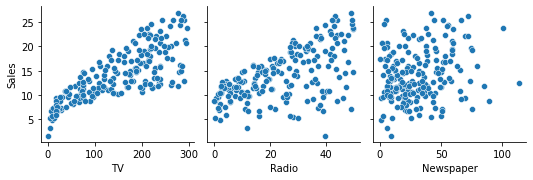

In [17]:
sns.pairplot(df,x_vars=["TV","Radio","Newspaper"],y_vars="Sales")

<AxesSubplot:>

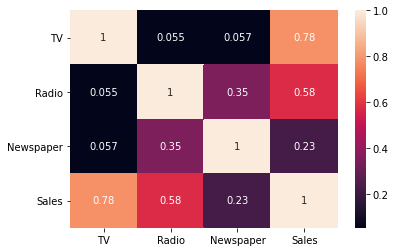

In [18]:
sns.heatmap(df.corr(),annot=True)

In [19]:
features=df.iloc[:,:-1]
target=df.iloc[:,-1]

In [20]:
features

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [21]:
target

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: Sales, Length: 200, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,random_state=1,test_size=0.3)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest) 

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(ytest,ypred)
mse=mean_squared_error(ytest,ypred)
rmse=np.sqrt(mse)
r2=r2_score(ytest,ypred)

In [24]:
print(f"MAE :{mae}\nMSE:{mse}\nRMSE:{rmse}\nR2_SCORE:{r2}")

MAE :1.0548328405073322
MSE:1.9289249074665724
RMSE:1.3888574107756968
R2_SCORE:0.9224605706201435


In [25]:
lr.coef_

array([0.04695205, 0.17658644, 0.00185115])

In [26]:
lr.intercept_

2.9372157346906107

In [27]:
pd.DataFrame(lr.coef_,index=features.columns,columns=["Coefficient"])

,Coefficient
TV,0.046952
Radio,0.176586
Newspaper,0.001851


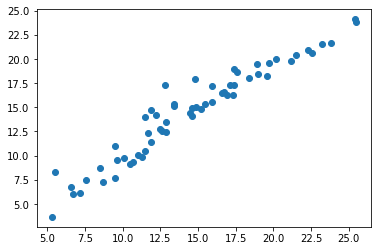

In [28]:
plt.scatter(ytest,ypred)

<AxesSubplot:xlabel='Sales', ylabel='Density'>

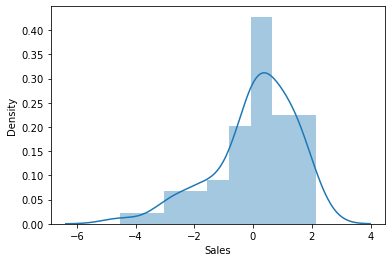

In [29]:
sns.distplot(ytest-ypred)

In [30]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=2)
xtrain_p=pf.fit_transform(xtrain)
xtest_p=pf.transform(xtest)

In [31]:
lr.fit(xtrain_p,ytrain)
ypred=lr.predict(xtest_p)

In [32]:
mse=mean_squared_error(ytest,ypred)
mse

0.22007456321529575

In [34]:
r2=r2_score(ytest,ypred)
r2

0.991153384983168

4 assumptions of Linear Regression are
1-  There should be linear relationship between target and features.
2- The relationship between feature and target is home skedastics that means variance between target and features  constant 
the non constant variance is call as hetro skedastics 
3- residuals should be normally distributed  
4- there should be no multi colinearly that is features should only co related target 
If any 3 of this 4 assumptions are fulfilled then we apply  the linear regression model other we apply polynomial regression.
 